In [140]:
from scipy.stats import rv_discrete
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache

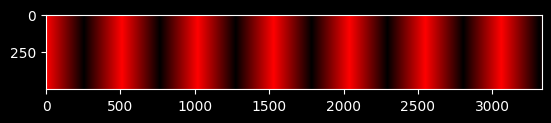

In [172]:
number = 1
step = 255
data = []
for number in range(10000):
    color = [0,0,0]
    if number % 3 == 0:
        color[number % 3] = abs((number // 3) % (step * 2) - step)
        data.append(color)

# plt.imshow([data, data, data])
plt.imshow(np.array([data]).repeat(500, axis=0))
    # color = "#{:0<2x}{:0<2x}{:0<2x}".format(*color)
    # print(color)

In [168]:
np.array([data]).repeat(2, axis=0)

array([[[255,   0,   0],
        [254,   0,   0],
        [253,   0,   0],
        ...,
        [ 16,   0,   0],
        [ 17,   0,   0],
        [ 18,   0,   0]],

       [[255,   0,   0],
        [254,   0,   0],
        [253,   0,   0],
        ...,
        [ 16,   0,   0],
        [ 17,   0,   0],
        [ 18,   0,   0]]])

In [ ]:
1234543212

In [133]:
for i in range(25):
    print(abs(i%10-5))


5
4
3
2
1
0
1
2
3
4
5
4
3
2
1
0
1
2
3
4
5
4
3
2
1


Несимметричная игральная кость подбрасывается до тех пор, пока не выпадут цифры 1 и 2. Пусть X — число сделанных при этом бросков. Даны вероятности появления цифр в одном броске: P(1) = 0.1 и P(2) = 0.2. Требуется найти:
1) E(X);
2) дисперсию X, если известно, что из 1 и 2 сначала выпала цифра 1.\
    Указание: разберите пример на применение формулы полного математического ожидания (лекция 14, слайд 13 из курса ТВ-2017).

In [65]:
def C(n, k):
    if 0 <= k <= n:
        nn = 1
        kk = 1
        for t in range(1, min(k, n - k) + 1):
            nn *= n
            kk *= t
            n -= 1
        return nn // kk
    else:
        return 0

In [73]:
r = 1
p = 0.2
k = 1

C(r+k-1, k)*p**r*(1-p)**k

0.16000000000000003

In [80]:
from sympy import solve


solve("0.8**n-0.1")

[10.3188511585162]

10.6466

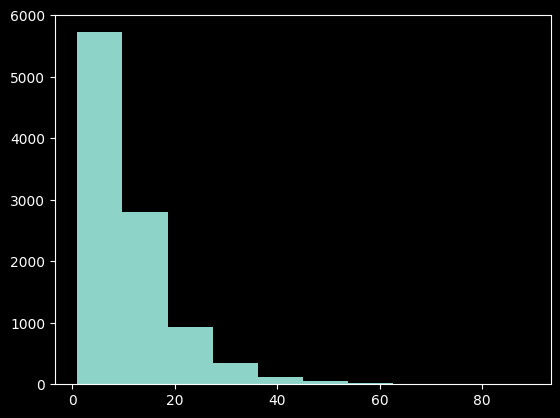

In [44]:
# E(X)

def X(values):
    t = np.random.choice(values[0], p=values[1], size=int(10/min(values[1])))
    return max(np.where(t == 1)[0][0], np.where(t == 2)[0][0])

values = [[1, 2, 3], [0.1, 0.2, 0.7]]
data = [X(values) for _ in range(10000)]
plt.hist(data)
np.mean(data)

28.13727271

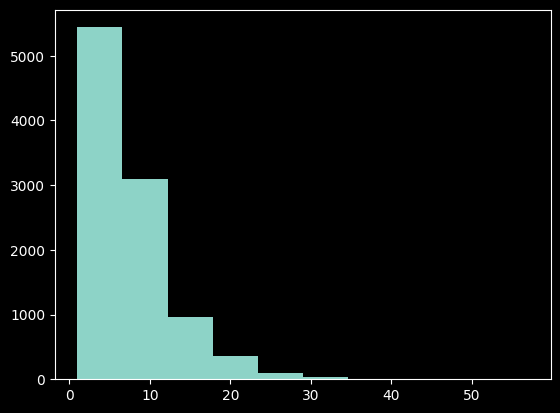

In [61]:
# var(X)



def X(values):
    while True:
        # t = rv_discrete(values=values).rvs(size=int(10/min(values[1])))
        t = np.random.choice(values[0], p=values[1], size=int(100/min(values[1])))
        if np.where(t == 1)[0][0] < np.where(t == 2)[0][0]:
            break
    return max(np.where(t == 1)[0][0], np.where(t == 2)[0][0])

values = [[1, 2, 3], [0.1, 0.2, 0.7]]
data = [X(values) for _ in range(10000)]
plt.hist(data)
np.var(data)

Несимметричная игральная кость подбрасывается до тех пор, пока не выпадут цифры 1, 2 и 3. Пусть X — число сделанных при этом бросков. Даны вероятности появления цифр в одном броске: P(1) = 0.1, P(2) = 0.2 и P(3) = 0.3. Требуется найти:
1) E(X);
2) дисперсию X, если известно, что из 1, 2 и 3 сначала выпала цифра 1, затем — 2.

11.1666

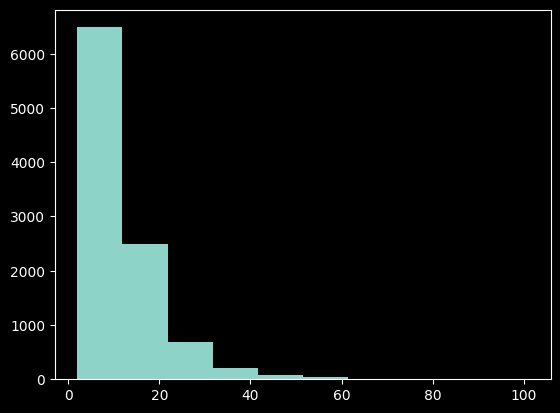

In [56]:
# E(X)


def X(values):
    t = np.random.choice(values[0], p=values[1], size=int(100 / min(values[1])))
    return max(np.where(t == i)[0][0] for i in [1, 2, 3])


values = [[1, 2, 3, 4], [0.1, 0.2, 0.3, 0.4]]
data = [X(values) for _ in range(10000)]
plt.hist(data)
np.mean(data)

29.42847951

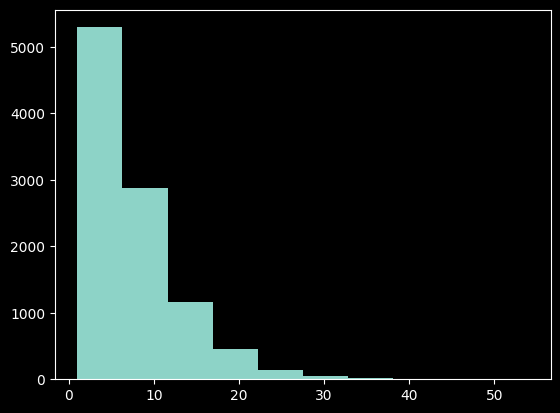

In [ ]:
# var(X)



def X(values):
    while True:
        # t = rv_discrete(values=values).rvs(size=int(10/min(values[1])))
        t = np.random.choice(values[0], p=values[1], size=int(100/min(values[1])))
        if np.where(t == 1)[0][0] < np.where(t == 2)[0][0]:
            break
    return max(np.where(t == 1)[0][0], np.where(t == 2)[0][0])

values = [[1, 2, 3], [0.1, 0.2, 0.7]]
data = [X(values) for _ in range(10000)]
plt.hist(data)
np.var(data)

In [81]:
0.3 * np.mean([0, 16*10]) + 0.7 * np.mean([0, 16*23])

152.79999999999998

In [109]:
from collections import Counter
def dist(data):
    plt.hist(data)
    # plt.scatter(*zip(*sorted(Counter(data).items())))

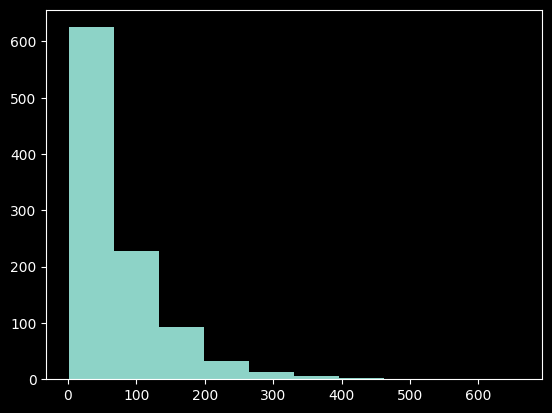

In [110]:
def dice():
    d = np.random.randint(1, 7)
    while np.random.randint(0, 2, 30).sum() != 11:
        d += np.random.randint(1, 7)
    return d

dist([dice() for _ in range(1000)])    

In [95]:
a = [dice() for _ in range(1000)]

In [99]:
list(zip(*sorted(Counter(a).items())))

[(1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  121,
  122,
  123,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  144,
  145,
  146,
  148,
  150,
  151,
  152,
  153,
  156,
  158,
  160,
  161,
  162,
  163,
  164,
  166,
  167,
  168,
  169,
 